<a href="https://colab.research.google.com/github/Sneha-Devare/Water_Shop_Analytics/blob/main/Copy_of_Water_Shop_Analytics_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Water Shop Analytics ML Project**

In [1]:
# Water Shop Analytics ML Project

#### **Project Overview**
The Water Shop Analytics System is a business-focused solution designed to provide clear visibility into customer visits, water can sales, payment behavior, and shop operations using CCTV footage. The system replaces manual tracking with automated insights to support better business decisions.

In [2]:
# Installation of YOLO
!pip install ultralytics    # Ultralytics is a library that created modern YOLO models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00


In [3]:
# Loading YOLO model
from ultralytics import YOLO     # Importing YOLO model from Ultralytics
# We use yolov8s.pt because it gives better detection accuracy and running fast
model = YOLO('yolov8m.pt')
print('Model Loaded')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model Loaded


In [4]:
# Importing matplotlotlib
# We are importing matplotlib to show images inside the notebook
import matplotlib.pyplot as plt


image 1/1 /content/zidane.jpg: 384x640 3 persons, 2 ties, 1791.7ms
Speed: 20.4ms preprocess, 1791.7ms inference, 48.2ms postprocess per image at shape (1, 3, 384, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: '

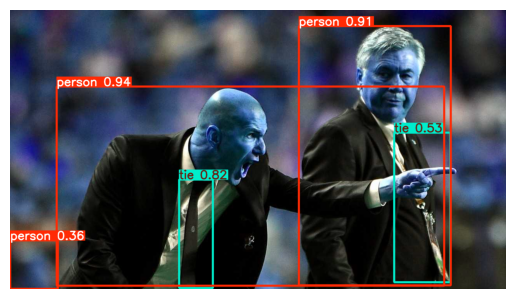

In [5]:
# Testing if a model can detect objects in an image
results = model("https://ultralytics.com/images/zidane.jpg")   # Sends an image to the YOLO model to detect objects
# Detection result stored in results object
# .plot() method draws bounding boxes around detected objects and adds labels to the image.
img = results[0].plot()      # It draws boxes and labels on the image and saves the new image in img.
plt.imshow(img)                 # Displaying image
plt.axis("off")         # No axis shown
print(results[0].names)        # All possible classes that model knows
print(results[0].boxes.cls)     # Shows classes which are detected

In [22]:
# Connecting of Google Drive with colab environment
from google.colab import drive    # Import Google Drive feature into the colab, so we can use it in our notebook
drive.mount('/content/drive')   #  Drive is just a folder created inside /content where our Google Drive gets attached.

ValueError: Mountpoint must not already contain files

In [7]:
import os      # Importing os module
base_path = "/content/drive/MyDrive/water_project"      # Here in this path everything will be created

# The list of folders we want to create inside water_project
folders = [
    "dataset/images/train",       # For training images
    "dataset/images/val",         # For Validation images
    "dataset/labels/train",       # For training labels
    "dataset/labels/val"          # For validation labels
]
for folder in folders:         # Iterating over folders
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)     # Creating folder and if exists don't show error

print("Dataset folders ready")

Dataset folders ready


In [8]:
# Screenshots from the video are imported and moved to train images folder

from google.colab import files
uploaded = files.upload()

import shutil          # Module in python used for file and folder operations, here we are using it for moving our image to train images folder
train_path = "/content/drive/MyDrive/water_project/dataset/images/train"

for f in uploaded:
    shutil.move(f, train_path + "/" + f)     # Moving images

print("Images moved")

Saving Screenshot (221).png to Screenshot (221).png
Saving Screenshot (220).png to Screenshot (220).png
Saving Screenshot (219).png to Screenshot (219).png
Saving Screenshot (217).png to Screenshot (217).png
Saving Screenshot (216).png to Screenshot (216).png
Saving Screenshot (215).png to Screenshot (215).png
Saving Screenshot (214).png to Screenshot (214).png
Saving Screenshot (212).png to Screenshot (212).png
Saving Screenshot (211).png to Screenshot (211).png
Saving Screenshot (207).png to Screenshot (207).png
Saving Screenshot (205).png to Screenshot (205).png
Images moved


In [9]:
# Moving some images to validation

train_path = "/content/drive/MyDrive/water_project/dataset/images/train"
val_path = "/content/drive/MyDrive/water_project/dataset/images/val"

files = os.listdir(train_path)

for f in files[:2]:        # Moving 2 images in images validation folder
    shutil.move(os.path.join(train_path, f), os.path.join(val_path, f))

print("Moved to val")

Moved to val


In [11]:
# Uploaded annotation zip from CVAT

from google.colab import files
uploaded = files.upload()

Saving Water_Analytics.zip to Water_Analytics.zip


In [12]:
# Extracted zip file
import zipfile  # for working with zip files

zip_name = list(uploaded.keys())[0]  # get uploaded zip file name
extract_path = "/content/extracted"  # Folder where files will be extracted

os.makedirs(extract_path, exist_ok=True)  # Create folder if not present

with zipfile.ZipFile(zip_name, 'r') as zip_ref:  # Open zip file
    zip_ref.extractall(extract_path)  # Extract everything into the folder

print("Unzipped")


Unzipped


In [13]:
# Move Label files

src = "/content/extracted/obj_train_data"
dst_train = "/content/drive/MyDrive/water_project/dataset/labels/train"
dst_val = "/content/drive/MyDrive/water_project/dataset/labels/val"

for file in os.listdir(src):
    if file.endswith(".txt"):
        img_png = file.replace(".txt", ".png")

        train_img = "/content/drive/MyDrive/water_project/dataset/images/train/" + img_png
        val_img = "/content/drive/MyDrive/water_project/dataset/images/val/" + img_png

        if os.path.exists(train_img):
            shutil.copy(os.path.join(src, file), os.path.join(dst_train, file))
        elif os.path.exists(val_img):
            shutil.copy(os.path.join(src, file), os.path.join(dst_val, file))

print("Labels copied")


Labels copied


In [15]:
# Created data.yaml for training a model

data_yaml = """
path: /content/drive/MyDrive/water_project/dataset
train: images/train
val: images/val

names:
  0: person
  1: water_can
"""

with open("/content/drive/MyDrive/water_project/dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created")


data.yaml created


In [18]:
# Training the model

from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/water_project/dataset/data.yaml",
    epochs=1,
    imgsz=640
)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/water_project/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78367f559730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/drive/MyDrive/water_project/dataset/images/train/Screenshot (221).png: 640x576 (no detections), 511.9ms
Speed: 8.5ms preprocess, 511.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 576)


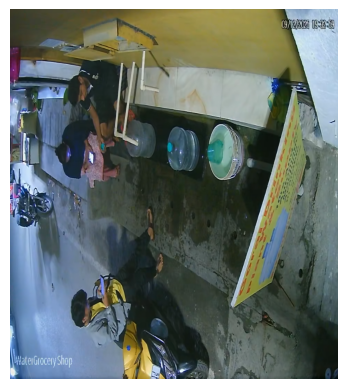

In [21]:
# Testing model on image

import cv2

model = YOLO("/content/runs/detect/train3/weights/best.pt")

img_folder = "/content/drive/MyDrive/water_project/dataset/images/train"
img_name = os.listdir(img_folder)[0]
img_path = img_folder + "/" + img_name

results = model(img_path)

img = results[0].plot()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()
